In [7]:
##task7.1

import os
import pandas as pd
import seaborn as sns
os.chdir('E:\[editted]\code\crimereport')

crime2019_df = pd.read_csv('Bostoncrimereport2019.csv', low_memory=False)
crime2020_df= pd.read_csv('bostoncrimereport2020.csv', low_memory=False)
combined_df = pd.concat([crime2019_df, crime2020_df])

dropnullreport_df=combined_df.dropna(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat','SHOOTING','OCCURRED_ON_DATE'])
new_df=dropnullreport_df.drop_duplicates(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat','SHOOTING','OCCURRED_ON_DATE'])
new_df.to_csv('crimereport.csv', index=False)
crime20192020_df = pd.read_csv('crimereport.csv', low_memory=False)


In [8]:
crime20192020_df['offense_type'] = None
crime20192020_df['offense_type'][crime20192020_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
crime20192020_df['offense_type'][crime20192020_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'
describe_by_offense = crime20192020_df.groupby(['offense_type', 'YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
print(describe_by_offense)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14168\1077186559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime20192020_df['offense_type'][crime20192020_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'


     offense_type  YEAR  INCIDENT_NUMBER
0  property crime  2019            13158
1  property crime  2020            12227
2   violent crime  2019             8324
3   violent crime  2020             5152


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14168\1077186559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime20192020_df['offense_type'][crime20192020_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'


In [9]:
## Compared with 2019, the incident numbers of property crime and violent crime both decrease in 2020.

    YEAR_x DISTRICT offense_type_x  violent_crimes  YEAR_y  offense_type_y  \
0     2019       A1  violent crime            1216    2019  property crime   
1     2019      A15  violent crime             153    2019  property crime   
2     2019       A7  violent crime             333    2019  property crime   
3     2019       B2  violent crime            1286    2019  property crime   
4     2019       B3  violent crime            1081    2019  property crime   
5     2019      C11  violent crime            1026    2019  property crime   
6     2019       C6  violent crime             621    2019  property crime   
7     2019      D14  violent crime             420    2019  property crime   
8     2019       D4  violent crime            1146    2019  property crime   
9     2019      E13  violent crime             432    2019  property crime   
10    2019      E18  violent crime             352    2019  property crime   
11    2019       E5  violent crime             254    2019  prop

<AxesSubplot:xlabel='property_crimes', ylabel='violent_crimes'>

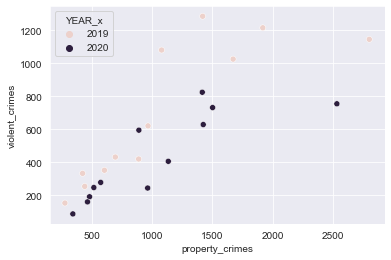

In [10]:
#task 7.2
crime20192020_df = crime20192020_df[crime20192020_df.DISTRICT != 'External']
total_by_district = crime20192020_df.groupby(['YEAR', 'DISTRICT','offense_type']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
violentcrime_df = total_by_district[total_by_district['offense_type'] == 'violent crime']
propertycrime_df=total_by_district[total_by_district['offense_type'] == 'property crime']

violentcrime2019_df= violentcrime_df[violentcrime_df['YEAR']==2019]
violentcrime2020_df= violentcrime_df[violentcrime_df['YEAR']==2020]
propertycrime2019_df= propertycrime_df[propertycrime_df['YEAR']==2019]
propertycrime2020_df= propertycrime_df[propertycrime_df['YEAR']==2020]

violentcrime2019_df= violentcrime2019_df.rename(columns={'INCIDENT_NUMBER':'violent_crimes'})
violentcrime2020_df= violentcrime2020_df.rename(columns={'INCIDENT_NUMBER':'violent_crimes'})
propertycrime2019_df= propertycrime2019_df.rename(columns={'INCIDENT_NUMBER':'property_crimes'})
propertycrime2020_df= propertycrime2020_df.rename(columns={'INCIDENT_NUMBER':'property_crimes'})

total2019_df=violentcrime2019_df.merge(propertycrime2019_df, how='left', left_on='DISTRICT', right_on='DISTRICT')
total2020_df=violentcrime2020_df.merge(propertycrime2020_df, how='left', left_on='DISTRICT', right_on='DISTRICT')

total20192020_df=pd.concat([total2019_df, total2020_df])
print(total20192020_df)

sns.scatterplot(x='property_crimes', y='violent_crimes', data=total20192020_df, hue='YEAR_x')

<AxesSubplot:xlabel='DISTRICT', ylabel='aunnual_sum'>

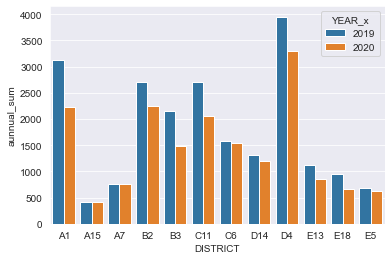

In [11]:
#task7.3
total20192020_df['aunnual_sum'] = total20192020_df['property_crimes'] + total20192020_df['violent_crimes']
sns.barplot(x='DISTRICT', y='aunnual_sum', data=total20192020_df, hue='YEAR_x')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14168\348640929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime19_df['quarter'] = None
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14168\348640929.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime19_df['quarter']=pd.cut(crime19_df['MONTH'],
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14168\348640929.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

<AxesSubplot:xlabel='quarter', ylabel='SHOOTING'>

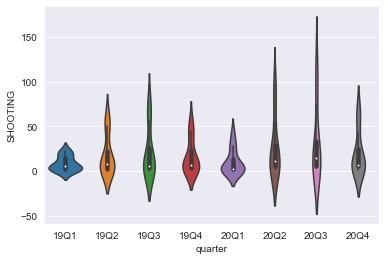

In [12]:
#task7.4
crime19_df = crime20192020_df[crime20192020_df['YEAR'] == 2019]
crime20_df = crime20192020_df[crime20192020_df['YEAR'] == 2020]

crime19_df['quarter'] = None
crime19_df['quarter']=pd.cut(crime19_df['MONTH'],
            bins=[1,3,6,9,12],
            labels=['19Q1','19Q2','19Q3','19Q4'])

crime20_df['quarter'] = None
crime20_df['quarter']=pd.cut(crime20_df['MONTH'],
            bins=[1,3,6,9,12],
            labels=['20Q1','20Q2','20Q3','20Q4'])

quarter1920_df=pd.concat([crime19_df, crime20_df])

describe_by_quarter = quarter1920_df.groupby(['DISTRICT','quarter','YEAR']).agg({'SHOOTING': 'sum'}).reset_index()
sns.violinplot(y='SHOOTING', x='quarter', data=describe_by_quarter)
